In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

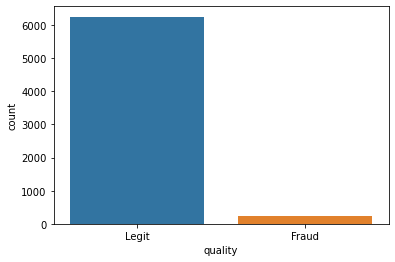

In [5]:
# CODE HERE
sns.countplot(data = df,x='quality')

<AxesSubplot:xlabel='type', ylabel='count'>

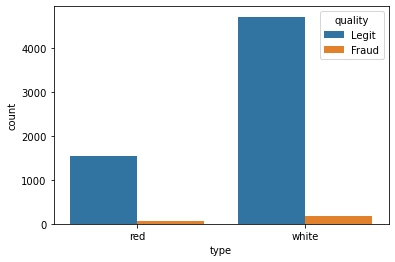

In [6]:
# CODE HERE
sns.countplot(data=df,hue='quality',x='type')

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [7]:
red = len(df[(df['quality'] == 'Fraud') & (df['type'] == 'red')])/len(df[df['type'] == 'red'])*100
print(f'Percentage of fraud in Red Wines:{red}')

Percentage of fraud in Red Wines:3.9399624765478425


In [8]:
white = len(df[(df['quality'] == 'Fraud') & (df['type'] == 'white')])/len(df[df['type'] == 'white'])*100
print(f'Percentage of fraud in White Wines:{white}')

Percentage of fraud in White Wines:3.7362188648427925


In [9]:
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

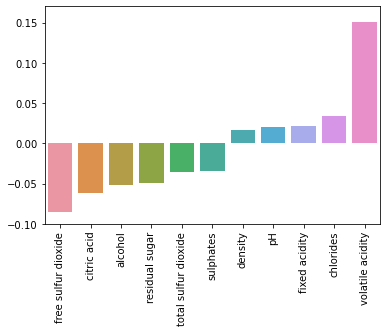

In [10]:
x= df.corr()['Fraud'][:-1].sort_values()
corr_values = pd.Series(data = x)
sns.barplot(x= corr_values.index,y=corr_values.values)
plt.ylim(-0.10,0.17)
plt.xticks(rotation=90);

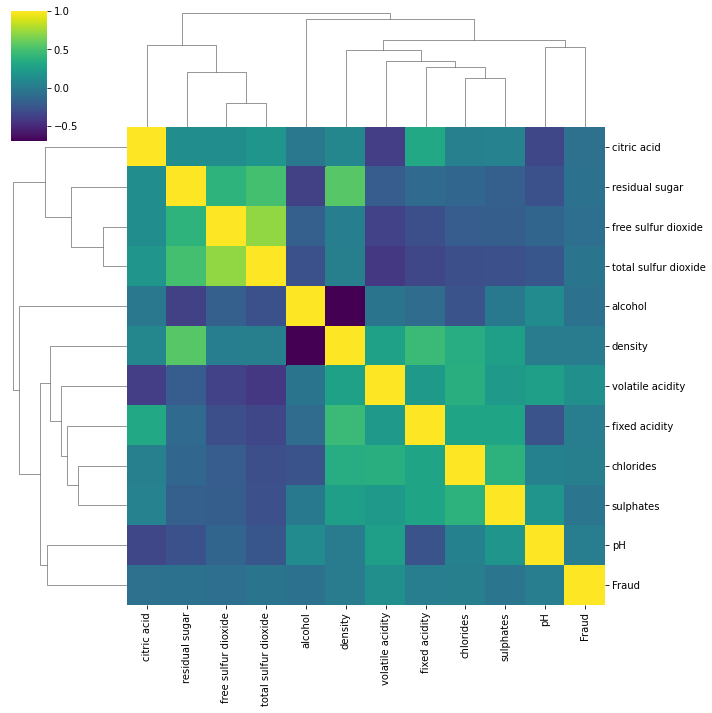

In [11]:
sns.clustermap(df.corr(),cmap='viridis')

----
## Machine Learning Model


In [12]:
df['type'] = pd.get_dummies(df['type'],drop_first = True)
df['type']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: uint8

In [13]:
X = df.drop('quality',axis =1)
y = df['quality']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced')

In [18]:
param_grid = {'C': [0.001,0.01,0.1,0.5,1],'gamma': ['scale','auto']}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
grid_model = GridSearchCV(svm,param_grid)

In [21]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [22]:
grid_model.best_params_

{'C': 0.1, 'gamma': 'scale'}

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = grid_model.predict(scaled_X_test)

In [24]:
confusion_matrix(y_test,y_pred)

array([[ 27,   0],
       [  0, 623]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00        27
       Legit       1.00      1.00      1.00       623

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650

